In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold = np.nan)
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        #print(Data[3745])
        #plt.figure()
        #plt.imshow(Data[3745])
        #plt.show()
        #print(Target)     # 0-9
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        #true =1 false=-1?
        #print(dataIndx)   #true or false
        #print(Data[dataIndx])  #Data[true]
        Data = Data[dataIndx]/255.
        #print(Data[0])
        Target = Target[dataIndx].reshape(-1, 1)
        #print(Target[10])
        #Target [size, 1]
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        #print(randIndx)
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        #print(Target)
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [18]:
def MSE(W, b, x, y, reg):
    loss = 0
    for i in range(0,len(y)):
        traning_data = x[i].flatten()
        loss =1/(2*len(y))*(np.dot(np.transpose(W),traning_data) + b - y[i])**2 + loss
    loss = loss + reg/2 * np.dot(np.transpose(W), W)
    return loss

In [19]:
def gradMSE(W, b, x, y, reg):
    grad_W = 0
    grad_b = 0
    for i in range(0,len(y)):
        traning_data = x[i].flatten()
        grad_W = (1/len(y)) * (np.dot(np.transpose(W),traning_data) + b - y[i]) * traning_data + grad_W
        grad_b = (1/len(y)) * (np.dot(np.transpose(W),traning_data) + b - y[i]) + grad_b
    grad_W = grad_W + reg * W
    return grad_W, grad_b

In [ ]:
def batch_grad_descent(W, b, x, y, alpha, epochs, reg, error_tol):
    old_loss = 0;
    rate_losses = []
    validate_losses = []
    test_losses = []
    for i in range(0,epochs):
        
        new_loss = MSE(W,b,x,y,reg)
        validate_loss = MSE(W,b,validData,validTarget,reg)
        test_loss = MSE(W,b,testData,testTarget,reg)
        
        grad_W, grad_b = gradMSE(W,b,x,y,reg)
        W = W - grad_W * alpha
        b = b - grad_b * alpha
        if abs(new_loss - old_loss) < error_tol:
            final_W = W
            final_b = b
        old_loss = new_loss
        #print(new_loss, i)
        rate_losses.append(new_loss)
        validate_losses.append(validate_loss)
        test_losses.append(test_loss)
        
    return rate_losses,validate_losses,test_losses

In [ ]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
weight = np.zeros(len(trainData[0].flatten()))
rate_losses,validate_losses,test_losses  = batch_grad_descent(weight,0, trainData, trainTarget, 0.005, 5000,0.5,1*10e-7)
print(rate_losses,validate_losses,test_losses)

In [ ]:
plt.figure(0)
plt.title("regularization parameter is 0.5")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(range(len(rate_losses)), rate_losses, 'g--', label="training")
plt.plot(range(len(validate_losses)), validate_losses, label="validate")
plt.plot(range(len(test_losses)), test_losses, label="testing")
plt.grid()
plt.legend()

In [ ]:
def batch_grad_descent_2(W, b, x, y, alpha, epochs, reg, error_tol):
    old_loss = 0;
    rate_losses = []
    for i in range(0,epochs):
        
        new_loss = MSE(W,b,x,y,reg)      
        grad_W, grad_b = gradMSE(W,b,x,y,reg)
        W = W - grad_W * alpha
        b = b - grad_b * alpha
        if abs(new_loss - old_loss) < error_tol:
            final_W = W
            final_b = b
        old_loss = new_loss
        #print(new_loss,validate_loss,test_loss, i)
        rate_losses.append(new_loss)
    return rate_losses

In [ ]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
weight = np.zeros(len(trainData[0].flatten()))
first_losses  = batch_grad_descent_2(weight,0, trainData, trainTarget, 0.005, 5000,0.001,1e-7)
second_losses  = batch_grad_descent_2(weight,0, trainData, trainTarget, 0.005, 5000,0.1,1e-7)
third_losses  = batch_grad_descent_2(weight,0, trainData, trainTarget, 0.005, 5000,0.5,1e-7)
print(first_losses,second_losses,third_losses)

In [ ]:
plt.figure(0)
plt.title("regularization parameter vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(range(len(first_losses)), first_losses, 'g--', label="0.001")
plt.plot(range(len(second_losses)), second_losses, label="0.1")
plt.plot(range(len(third_losses)), third_losses, label="0.5")
plt.grid()
plt.legend()

In [ ]:
print(first_losses[-1], second_losses[-1], third_losses[-1])

In [ ]:
def normal_equation(x,y):
    training = np.empty((len(y),len(trainData[0].flatten())))
    for i in range(0,len(y)):
        training[i] = x[i].flatten()
    final = np.dot(np.linalg.inv(np.dot(np.transpose(training),training)),np.dot(np.transpose(training),y))
    return final_weight

In [ ]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
final_weight = normal_equation(trainData,trainTarget)
result = MSE(final_weight, 0, trainData, trainTarget, 0)
print(result)

In [ ]:
def crossEntropyLoss(W, b, x, y, reg):
    loss = 0
    for i in range(0,len(y)):
        traning_data = x[i].flatten()
        y_bar = np.dot(np.transpose(W),traning_data) + b
        loss =1/(len(y))*(np.log(1 + np.exp(-y_bar)) + (1-y[i])*y_bar) + loss
    loss = loss + reg/2 * np.dot(np.transpose(W), W)
    #print(y_bar)
    return loss

In [ ]:
def gradCE(W, b, x, y, reg):
    grad_W = 0
    grad_b = 0.0
    for i in range(0,len(y)):
        traning_data = x[i].flatten()
        expo_fun = np.exp(-(np.dot(np.transpose(W),traning_data) + b))
        grad_W = (1/len(y)) * ((1-y[i]) - (expo_fun/(1+expo_fun))) * traning_data + grad_W
        grad_b = (1/len(y)) * (1/(1+expo_fun) - y[i]) + grad_b
    grad_W = grad_W + reg * W
    #print(grad_W)
    return grad_W, grad_b

In [ ]:
def grad_descent(W, b, x, y, alpha, iterations, reg, EPS, lossType="None"):
    old_loss = 0;
    rate_losses = []
    validate_losses = []
    test_losses = []
    for i in range(0,iterations):
        if(lossType == "b"):
            new_loss = MSE(W,b,x,y,reg)
            #validate_loss = MSE(W,b,validData,validTarget,reg)
            #test_loss = MSE(W,b,testData,testTarget,reg)

            grad_W, grad_b = gradMSE(W,b,x,y,reg)
            W = W - grad_W * alpha
            b = b - grad_b * alpha
            if abs(new_loss - old_loss) < EPS:
                final_W = W
                final_b = b
            old_loss = new_loss
            rate_losses.append(new_loss)
            #validate_losses.append(validate_loss)
            #test_losses.append(test_loss)
            #print(new_loss, i)
        elif(lossType == "c"):
            new_loss = crossEntropyLoss(W,b,x,y,reg)
            #validate_loss = crossEntropyLoss(W,b,validData,validTarget,reg)
            #test_loss = crossEntropyLoss(W,b,testData,testTarget,reg)
            grad_W, grad_b = gradCE(W,b,x,y,reg)
            W = W - grad_W * alpha
            b = b - grad_b * alpha
            if abs(new_loss - old_loss) < EPS:
                final_W = W
                final_b = b
            old_loss = new_loss
            rate_losses.append(new_loss)
            #validate_losses.append(validate_loss)
            #test_losses.append(test_loss)
            
            #print(new_loss, i)
    return rate_losses

In [ ]:
def buildGraph(beta1=None, beta2=None, epsilon=None, lossType=None, learning_rate=None):
    # Your implementation here
    pass

In [ ]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
weight = np.zeros(len(trainData[0].flatten()))
first_losses, second_losses, third_losses = grad_descent(weight, 0, trainData,trainTarget, 0.005, 5000, 0.1, 1*10e-7, "c")
print(first_losses, second_losses, third_losses)

In [ ]:
print(first_losses[-1], second_losses[-1], third_losses[-1])

In [ ]:
plt.figure(0)
plt.title("Logistic regression (reg 0.005)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(range(700), first_losses[:700], 'g--', label="training")
plt.plot(range(700), second_losses[:700], 'r--', label="validate")
plt.plot(range(700), third_losses[:700], 'y--',label="testing")
plt.grid()
plt.legend()

In [ ]:
def accuracy_CE(W, b, x, y, reg):
    correct = 0
    for i in range(0,len(y)):
        traning_data = x[i].flatten()
        sigma = 1/(1+ np.exp(-(np.dot(np.transpose(W),traning_data) + b)))
        if(y[i] == 0 and sigma <=0.5):
            correct = correct +1
        elif(y[i] == 1 and sigma >0.5):
            correct = correct +1
    accuracy_rate = (correct/len(y))*100
    #print(accuracy_rate)
    return accuracy_rate

In [ ]:
def accuracy(W, b, x, y, alpha, iterations, reg, EPS, lossType="None"):
    old_loss = 0;
    rate_losses = []
    validate_losses = []
    test_losses = []
    for i in range(0,iterations):
        if(lossType == "b"):
            new_loss = MSE(W,b,x,y,reg)
            validate_loss = MSE(W,b,validData,validTarget,reg)
            test_loss = MSE(W,b,testData,testTarget,reg)
            grad_W, grad_b = gradMSE(W,b,x,y,reg)

            W = W - grad_W * alpha
            b = b - grad_b * alpha
            if abs(new_loss - old_loss) < EPS:
                final_W = W
                final_b = b
            old_loss = new_loss
            rate_losses.append(new_loss)
            #validate_losses.append(validate_loss)
            #test_losses.append(test_loss)
        elif(lossType == "c"):
            new_loss = accuracy_CE(W,b,x,y,reg)
            validate_loss = accuracy_CE(W,b,validData,validTarget,reg)
            test_loss = accuracy_CE(W,b,testData,testTarget,reg)
            grad_W, grad_b = gradCE(W,b,x,y,reg)
            W = W - grad_W * alpha
            b = b - grad_b * alpha
            if abs(new_loss - old_loss) < EPS:
                final_W = W
                final_b = b
            old_loss = new_loss
            rate_losses.append(new_loss)
            validate_losses.append(validate_loss)
            test_losses.append(test_loss)
            
            #print(new_loss, i)
    return rate_losses,validate_losses,test_losses

In [ ]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
weight = np.zeros(len(trainData[0].flatten()))
first_losses, second_losses, third_losses = accuracy(weight, 0, trainData,trainTarget,  0.005, 5000, 0.1, 1*10e-7, "c")
print(first_losses, second_losses, third_losses)

In [ ]:
plt.figure(0)
plt.title("Accuracy curve (reg 0.005)")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.plot(range(700), first_losses[1:701], 'g--', label="training")
plt.plot(range(700), second_losses[1:701], 'r--', label="validate")
plt.plot(range(700), third_losses[1:701], 'y--',label="testing")
plt.grid()
plt.legend()

In [ ]:
print(max(first_losses), max(second_losses), max(third_losses))

In [ ]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
weight = np.zeros(len(trainData[0].flatten()))
#first_losses = grad_descent(weight, 0, trainData,trainTarget, 0.005, 5000, 0.1, 1*10e-7, "b")
second_losses = grad_descent(weight, 0, trainData,trainTarget, 0.005, 5000, 0.1, 1*10e-7, "c")
print(first_losses)

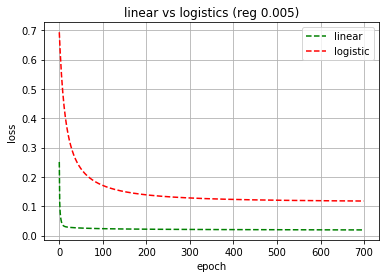

In [15]:
plt.figure(0)
plt.title("linear vs logistics (reg 0.005)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(range(700), first_losses[0:700], 'g--', label="linear")
plt.plot(range(700), second_losses[0:700],'r--', label="logistic")
plt.grid()
plt.legend()

In [ ]:
print(first_losses.shape)

In [16]:
def accuracy_MSE(W, b, x, y, reg):
    correct = 0
    for i in range(0,len(y)):
        traning_data = x[i].flatten()
        y_hat = np.dot(np.transpose(W),traning_data) + b
        if(y[i] == 0 and np.sign(y_hat)== -1):
            correct = correct +1
        elif(y[i] == 1 and np.sign(y_hat)== 1):
            correct = correct +1
    accuracy_rate = (correct/len(y))*100
    return accuracy_rate